Подключение необходимых библиотек - matplotlib для визуализации, torch для работы с нейронной сетью

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

import torch

Составление обучающей выборки - 1 шаг - Создание точек по функции

Text(0.5, 1.0, 'y = sin(x)')

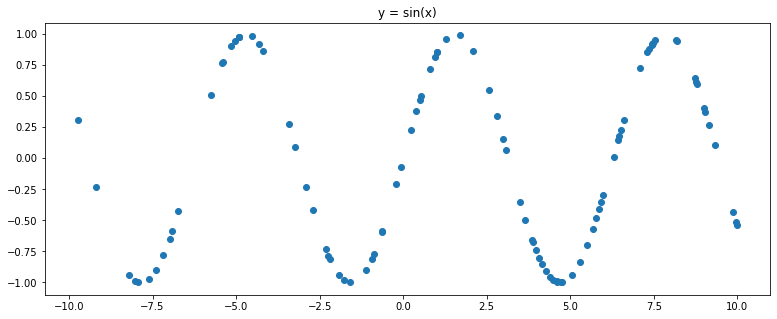

In [41]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('y = sin(x)')

Составление обучающей выборки - 2 шаг - Создание шума

Text(0.5, 1.0, 'Gaussian noise')

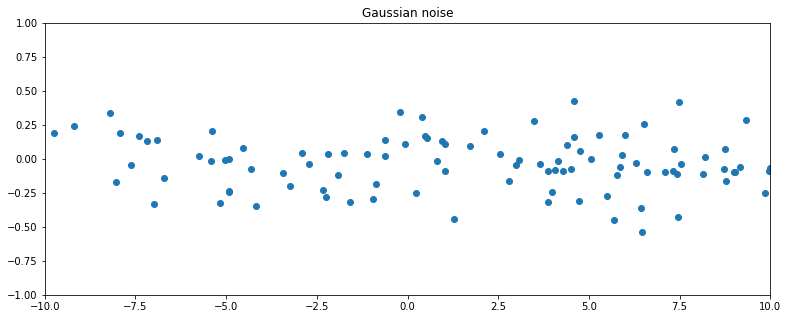

In [42]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise')

Составление обучающей выборки - 3 шаг - Прибавляем шум (как погрешность) к соответствующим точкам

Text(0, 0.5, 'y_train')

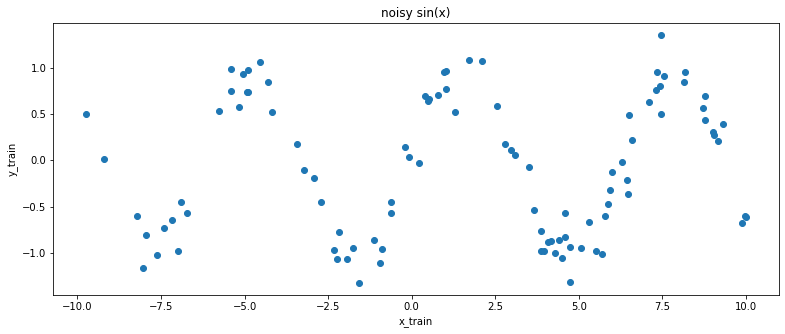

In [43]:
y_train = y_train + noise

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train')

Превратим матрицы-строки в матрицы-столбцы - метод unsqueeze

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

Составление проверочной выборки (в данном случае шума не будет, однако в реальных задачах также присутствует шум)

Text(0, 0.5, 'y_validation')

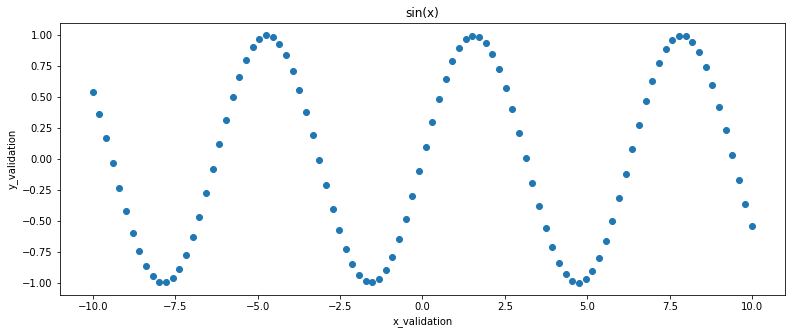

In [45]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)

plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

И опять превращение строк в столбцы

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

Создадим класс нейронной сети с двумя слоями - в первом находится n_hidden_neirons нейронов, во втором - всего один нейрон


In [47]:
class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

sine_net = SineNet(200)

Самое интересное - обучение :)

Во-первых, нам нужен оптимизатор, который будет совершать шаги градиентного спуска

In [48]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr = 0.01)

Во-вторых, нам нужна функция потерь - функция, показывающая, насколько мы далеки от идеала

In [49]:
def loss(pred, target):
  squares = (pred - target) ** 2
  return squares.mean()

В-третьих, что не так важно, но так красиво, нам нужна функция вывода нужных значений и значений, которые нам выдала нейронная сеть

In [50]:
def predict(net, x, y):
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), 'o', label = 'Right values')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label = 'Prediction')
  plt.legend(loc='upper left')
  plt.xlabel('x')
  plt.ylabel('y')


Что ж, у нас все есть) Начинаем тренировку!

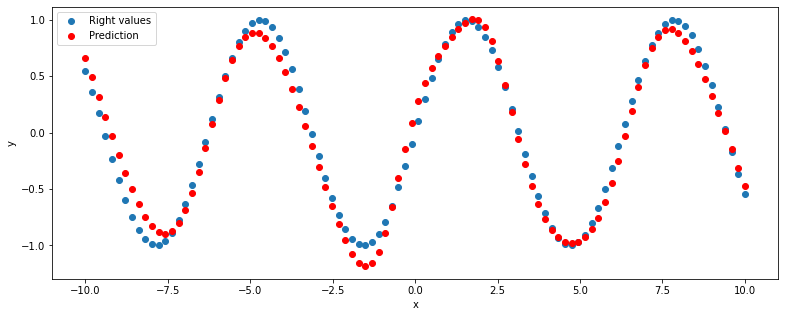

In [51]:
for epoch_index in range(2000):
  optimizer.zero_grad()

  y_pred = sine_net.forward(x_train)
  loss_val = loss(y_pred, y_train)

  loss_val.backward()

  optimizer.step()

predict(sine_net, x_validation, y_validation)